<a href="https://colab.research.google.com/github/raynergomes/Artificial-Algae-Algorithm/blob/master/Resumido_Stream_Classificacao_ICV-2023-2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
colunas = [
      'service',
      'latency',
      'jitter',
      'bit_rate',
      'packet_loss_rate',
      'peak_data_rate_dl',
      'peak_data_rate_ul',
      'mobility',
      'reliability',
      'availability',
      'survival_time',
      'experienced_data_rate_dl',
      'experienced_data_rate_ul',
      'interruption_time',
      'problem'
]

In [ ]:
# import plotly.express as px
# px.box(pd.DataFrame(dados[dados['service']=='e_Health'], columns = colunas ), x="latency",
#              color="problem")

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)


In [3]:
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

dados = pd.read_csv('dataset_06.csv')
x = dados.drop('problem', axis = 1)
y = dados['problem']

coluns = x.columns
one_hot = make_column_transformer(
    (
      OneHotEncoder(drop = 'if_binary'), ['service']
    ),
  remainder = 'passthrough',
  sparse_threshold=0
)
x = one_hot.fit_transform(x)


In [ ]:
x

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.23986091e+02, 1.75276734e+00, 7.53328854e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.37536841e+02, 1.53681582e+00, 2.70377099e+01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.64606064e+01, 1.46711159e+01, 1.00919056e+03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.74385815e+02, 1.33011727e+00, 1.35701725e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.67827656e+01, 3.78566333e+01, 6.06897941e-07],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.15641388e-01, 1.77383386e+01, 1.59035246e-07]])

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib
from sklearn.preprocessing import MinMaxScaler


# Lista para armazenar os resultados
results = []

# Lista para armazenar as matrizes de confusão
confusion_matrices = []

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, stratify=y, random_state = 5)
# normalizacao = MinMaxScaler()
# x_treino = normalizacao.fit_transform(x_treino)
# x_teste = normalizacao.transform(x_teste)

# Função para treinar e avaliar um modelo
def train_and_evaluate_model(model, name):
    model.fit(x_treino, y_treino)
    y_pred = model.predict(x_teste)
    accuracy = accuracy_score(y_teste, y_pred)
    precision = precision_score(y_teste, y_pred)
    recall = recall_score(y_teste, y_pred)
    f1 = f1_score(y_teste, y_pred)
    confusion = confusion_matrix(y_teste, y_pred)
    results.append([name, accuracy, precision, recall, f1])
    confusion_matrices.append([name, confusion])

# Criar e treinar os modelos
models = [
    DummyClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier()
]

model_names = [
    'Dummy',
    'Regressão Logística',
    'Árvore de Decisão',
    'Random Forest',
    'SVM',
    'KNC'
]

for model, name in zip(models, model_names):
    train_and_evaluate_model(model, name)

# Exibir os resultados
results_df = pd.DataFrame(results, columns=['Modelo', 'Acurácia', 'Precisão', 'Recall', 'F1 Score'])
print(results_df)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                Modelo  Acurácia  Precisão    Recall  F1 Score
0                Dummy  0.666667  0.666667  1.000000  0.800000
1  Regressão Logística  0.666667  0.666667  1.000000  0.800000
2    Árvore de Decisão  0.846696  0.880925  0.890400  0.885637
3        Random Forest  0.881304  0.973380  0.845067  0.904696
4                  SVM  0.666667  0.666667  1.000000  0.800000
5                  KNC  0.752178  0.855533  0.755911  0.802643


In [ ]:
results_df

,Modelo,Acurácia,Precisão,Recall,F1 Score
0,Dummy,0.666667,0.666667,1.000000,0.800000
1,Regressão Logística,0.666667,0.666667,1.000000,0.800000
2,Árvore de Decisão,0.846281,0.880049,0.890844,0.885414
3,Random Forest,0.881600,0.973781,0.845156,0.904921
4,SVM,0.666667,0.666667,1.000000,0.800000
5,KNC,0.752178,0.855533,0.755911,0.802643


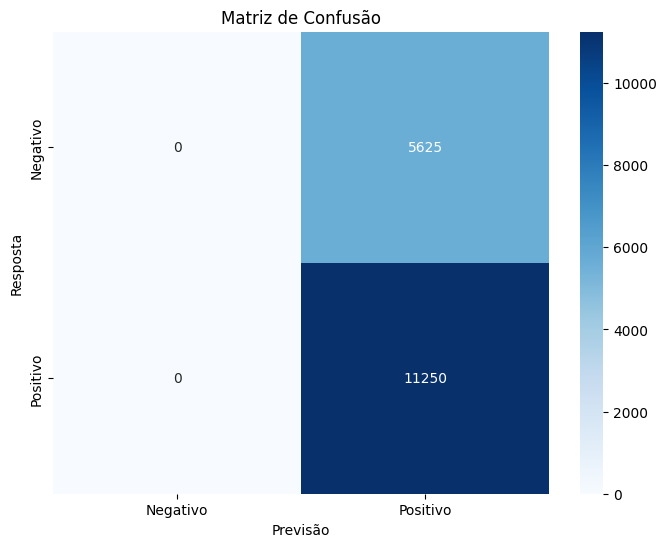

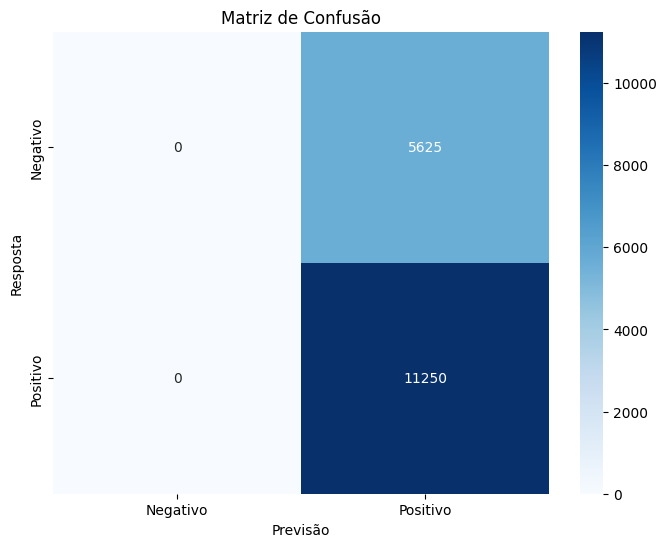

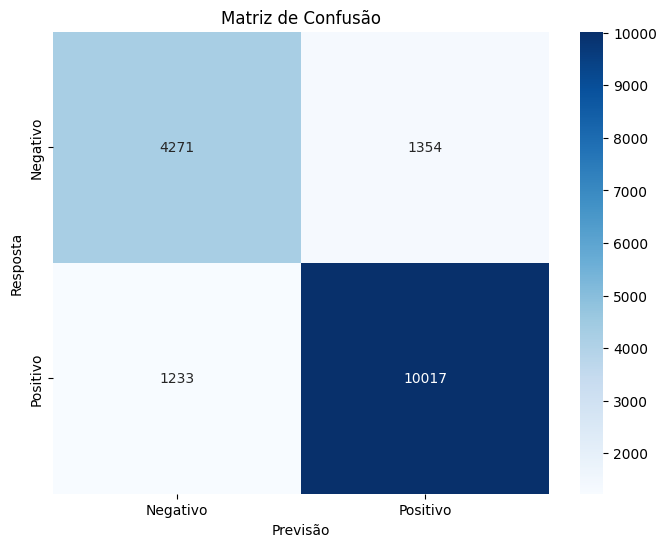

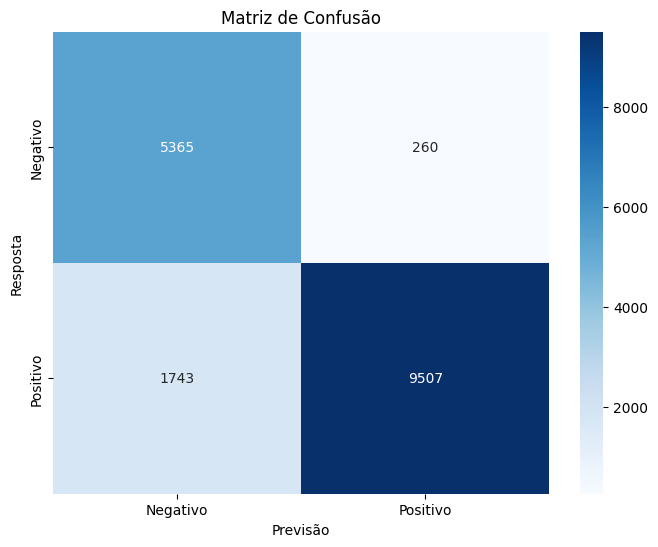

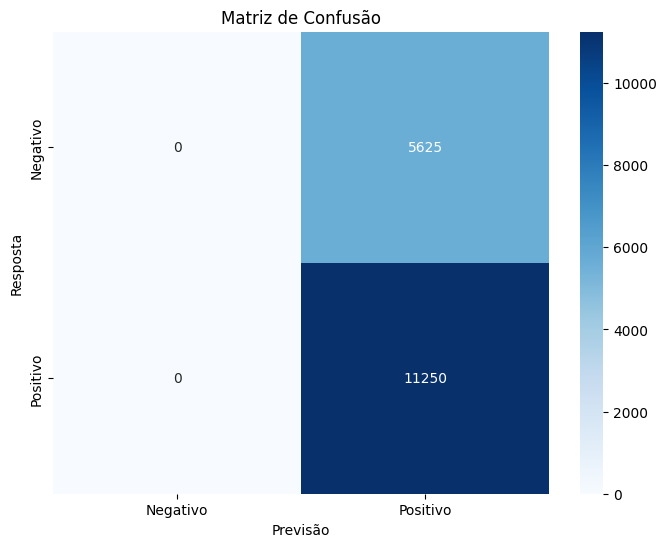

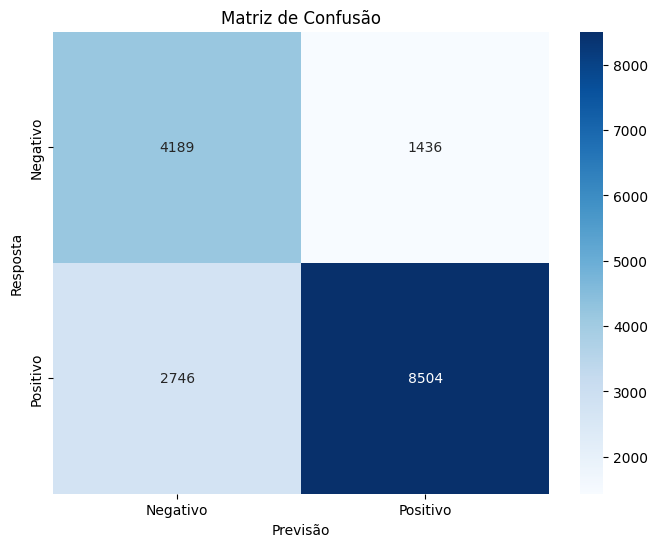

In [5]:
# Salvar os gráficos das matrizes de confusão
for name, confusion in confusion_matrices:
    # Plotar matriz de confusão
    labels = ['Negativo', 'Positivo']
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt="d", cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Previsão')
    plt.ylabel('Resposta')
    plt.title('Matriz de Confusão')
    # plt.savefig(name.lower().replace(' ', '_') + '_confusion_matrix.png', dpi=300)
    plt.show()

In [6]:
"""Para o provedor é pior ofertar um serviço com problema,
então o a Precisão é a métrica mais importante """

from sklearn.model_selection import cross_validate, KFold
import statistics as stat

def intervalo_conf(resultados, step):
  media = resultados['test_score'].mean()
  desvio_padrao = cv_resultados['test_score'].std()
  print(f'Intervalo de confiança 1 {step}: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

def intervalo_conf2(media, desvio_padrao):
  print(f'Intervalo de confiança 2: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

medias = []
dps = []
for step in range(30):
  # Rodar várias vezes para calcular o intervalo de confiança
  # Random Florest
  from sklearn.ensemble import RandomForestClassifier
  floresta = RandomForestClassifier(random_state = 5)
  kf = KFold(n_splits=5, shuffle=True, random_state=5)
  cv_resultados = cross_validate(floresta, x, y, cv=kf, scoring = 'precision')
  cv_resultados
  medias.append(cv_resultados['test_score'].mean())
  dps.append(cv_resultados['test_score'].std())
  intervalo_conf(cv_resultados, step)

media_geral = stat.mean(medias)
desvio_padrao_geral = stat.stdev(dps)
print("Media Geral:",media_geral)
print("Desvio Geral:", desvio_padrao_geral)
intervalo_conf2(media_geral, desvio_padrao_geral)




Intervalo de confiança 1 0: [0.9719322043877339, 0.9779979430294334]
Intervalo de confiança 1 1: [0.9719322043877339, 0.9779979430294334]
Intervalo de confiança 1 2: [0.9719322043877339, 0.9779979430294334]
Intervalo de confiança 1 3: [0.9719322043877339, 0.9779979430294334]
Intervalo de confiança 1 4: [0.9719322043877339, 0.9779979430294334]
Intervalo de confiança 1 5: [0.9719322043877339, 0.9779979430294334]
Intervalo de confiança 1 6: [0.9719322043877339, 0.9779979430294334]
Intervalo de confiança 1 7: [0.9719322043877339, 0.9779979430294334]


KeyboardInterrupt: 

In [8]:
# RNA

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
dataset = pd.read_csv('dataset_06.csv')

# Separar os dados em features (X) e rótulos (y)
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values



In [ ]:
y

array([0, 0, 1, ..., 1, 0, 1])

In [9]:
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

dados = pd.read_csv('dataset_06.csv')
x = dados.drop('problem', axis = 1)
y = dados['problem']

coluns = x.columns
one_hot = make_column_transformer(
    (
      OneHotEncoder(drop = 'if_binary'), ['service']
    ),
  remainder = 'passthrough',
  sparse_threshold=0
)
X = one_hot.fit_transform(x)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
5907/5907 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.6474 - loss: 242.4911 - val_accuracy: 0.6940 - val_loss: 0.4891
Epoch 2/10
5907/5907 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7010 - loss: 0.4692 - val_accuracy: 0.7108 - val_loss: 0.4963
Epoch 3/10
5907/5907 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.7176 - loss: 0.5041 - val_accuracy: 0.7313 - val_loss: 0.5095
Epoch 4/10
5907/5907 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7222 - loss: 0.4564 - val_accuracy: 0.7104 - val_loss: 0.4375
Epoch 5/10
5907/5907 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7348 - loss: 0.4251 - val_accuracy: 0.7477 - val_loss: 0.4114
Epoch 6/10
5907/5907 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7473 - loss: 0.4109 - val_accuracy: 0.7744 - val_loss: 0.3882
Epoch 7/10
5907/5907 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7692 - loss: 0.3946 - val_accuracy: 0.7885 - val_loss: 0.3795
Epoch 8/10
5907/5907 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7783 - loss:

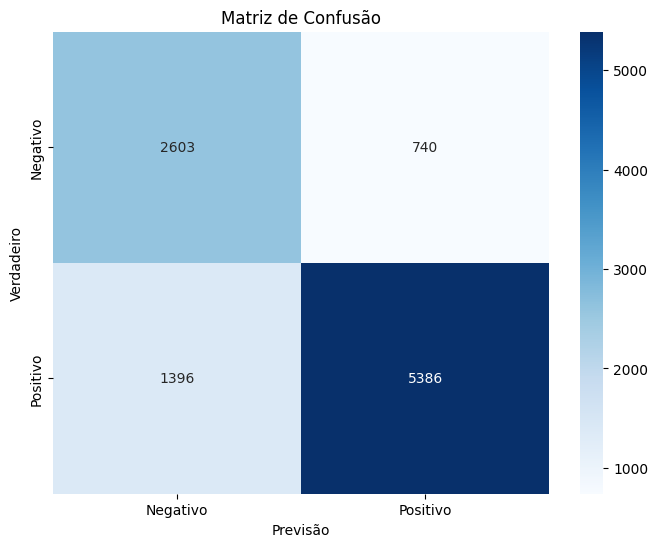

In [ ]:
# Dividir o dataset em conjunto de treinamento, validação e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2)

# Definir a arquitetura do modelo
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8)

# Fazer previsões no conjunto de teste
predictions = model.predict(X_test)

# Converter as previsões em classes (0 ou 1)
predicted_classes = (predictions > 0.5).astype(int)

# Calcular a matriz de confusão
confusion = confusion_matrix(y_test, predicted_classes)

# Imprimir matriz de confusão
print("Matriz de Confusão:")
print(confusion)

# Calcular as métricas de avaliação
accuracy = accuracy_score(y_test, predicted_classes)
precision = precision_score(y_test, predicted_classes)
recall = recall_score(y_test, predicted_classes)
f1 = f1_score(y_test, predicted_classes)

# Exibir as métricas de avaliação
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Plotar matriz de confusão
labels = ['Negativo', 'Positivo']
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.savefig('RNA_confusion_matrix.png', dpi=300)
plt.show()

In [ ]:
from tensorflow.keras.utils import plot_model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,357 (9.21 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,572 (6.14 KB)

None


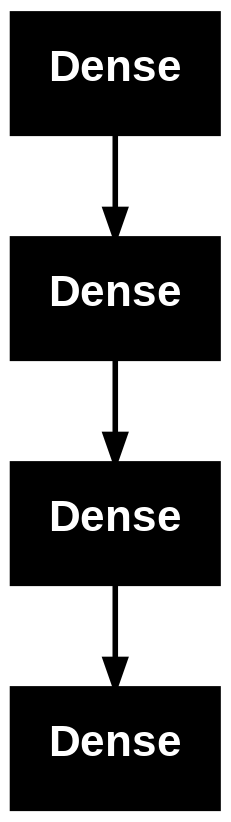

In [ ]:
print(model.summary())
# plot graph
plot_model(model, to_file='simple_model.png')

In [ ]:
!pip install keras-vis

DEPRECATION: neuralplot 0.0.8 has a non-standard dependency specifier matplotlib>=3.1numpy>=1.16. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of neuralplot or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [ ]:
!pip install git+https://github.com/raghakot/keras-vis.git --upgrade

  Cloning https://github.com/raghakot/keras-vis.git to /tmp/pip-req-build-2a6e3b8e
  Running command git clone --filter=blob:none --quiet https://github.com/raghakot/keras-vis.git /tmp/pip-req-build-2a6e3b8e
  Resolved https://github.com/raghakot/keras-vis.git to commit 90ae5565951b5e6a90d706b8205c2c4dfc271505
  Preparing metadata (setup.py) ... done
  Created wheel for keras-vis: filename=keras_vis-0.5.0-py2.py3-none-any.whl size=30847 sha256=c334de9f023c094c2bc500bbb724ebdb9ff90f9efcea1b9e019a7a5884c29b34
  Stored in directory: /tmp/pip-ephem-wheel-cache-do18_k9a/wheels/44/35/01/af34bb9aa7e62e6e86ea8af6cbd2c71e124824e8500af576b1
Successfully built keras-vis
DEPRECATION: neuralplot 0.0.8 has a non-standard dependency specifier matplotlib>=3.1numpy>=1.16. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of neuralplot or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be

In [ ]:
import numpy as np
from collections.abc import Iterable
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from vis.visualization import visualize_activation
from vis.utils import utils

from vis.visualization import visualize_saliency
from vis.utils import utils


input_data = np.random.random((1, 32))  # Exemplo de entrada aleatória

# Visualizando o saliency map
layer_idx = utils.find_layer_idx(model, 'dense_1')  # Índice da camada que você deseja visualizar
grads = visualize_saliency(model, layer_idx, filter_indices=None, seed_input=input_data)

# Exibindo o saliency map
import matplotlib.pyplot as plt
plt.imshow(grads[0], cmap='jet')
plt.axis('off')
plt.show()

ImportError: cannot import name 'advanced_activations' from 'keras.layers' (/usr/local/lib/python3.10/dist-packages/keras/api/layers/__init__.py)